Online retail 
---

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


# TASK 1 prepare & clean
---

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [566]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from feature_engine.outliers import Winsorizer

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [585]:
df_raw = pd.read_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/online_retail_II.csv')

In [586]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


 **Find NaN rows**

In [587]:
df_raw.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

 **Let's see NaN rows in dataframe**

In [588]:
df_raw[df_raw.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


 **Drop NaN CustomerID then create dataframe name df_new**

In [589]:
df_new = df_raw.dropna().reset_index()
df_new = df_new.drop(columns='index')
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 **Drop negative Quantity value**

In [590]:
df_new = df_new[df_new['Quantity'] > 0 ]
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 **Create total columns**

total = quantity * price

In [591]:
df_new['total'] = df_new['Quantity'] * df_new['Price']
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [592]:
df_new = df_new.reset_index()
df_new = df_new.drop(columns=['index'])

In [69]:
df_new.to_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/edit_online_retail.csv')

# TASK 2 Visualize the dataset
---
I use Tableau for visualizing charts that may be interesting

# TASK 3 RFM analysis
---
Recency-Frequency-Monetary

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

 * Recency — how long it’s been since a customer bought something from us

 * Frequency — how often a customer buys from us

 * Monetary value — the total value of purchases a customer has made


### Monetary

In [593]:
monetary = df_new.groupby(['Customer ID'])['total'].sum()
monetary = pd.DataFrame(monetary).reset_index()
monetary.head()

,Customer ID,total
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


### Frequency

In [594]:
frequency = df_new.groupby(['Customer ID'])['Invoice'].count()
frequency = pd.DataFrame(frequency).reset_index()
frequency.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


### Recency

In [595]:
#turn to datetime dtype
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

In [596]:
df_new['diff'] = df_new['InvoiceDate'].max() - df_new['InvoiceDate']

In [597]:
recency = df_new.groupby(['Customer ID'])['diff'].min()
recency = pd.DataFrame(recency).reset_index()
recency['diff'] = recency['diff'].dt.days
recency.head()

,Customer ID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


## merge 3 dataframe to RFM dataframe

In [663]:
rfm = pd.merge(monetary, recency, on='Customer ID', how='inner')
rfm = pd.merge(rfm, frequency, on='Customer ID', how='inner')

In [664]:
rfm.columns = ['Customer ID', 'Monetary', 'Recency', 'Frequency']
rfm.head()

,Customer ID,Monetary,Recency,Frequency
0,12346.0,77556.46,325,34
1,12347.0,5633.32,1,253
2,12348.0,2019.40,74,51
3,12349.0,4428.69,18,175
4,12350.0,334.40,309,17


 **Outliers Detection :**
 
Due to K-Means Clustering is sensitive to outliers, 
I want to remove outliers for appropriate results.

 * First, Let's see RFM boxplot.

 * Then detection outliers base on quautile.

Text(0, 0.5, 'Range')

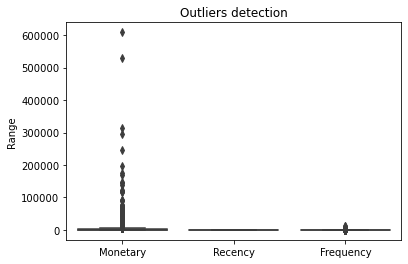

In [665]:
sns.boxplot(data = rfm[['Monetary', 'Recency', 'Frequency']])
plt.title('Outliers detection')
plt.ylabel('Range')


The outliers can be observed in all 3 columns and need to be removed.

In [666]:
rfm.describe()

,Customer ID,Monetary,Recency,Frequency
count,5881.000000,5881.000000,5881.000000,5881.000000
mean,15314.674205,3017.076888,200.457745,136.986907
std,1715.429759,14734.128619,209.474135,353.779018
min,12346.000000,0.000000,0.000000,1.000000
25%,13833.000000,347.800000,25.000000,21.000000
50%,15313.000000,897.620000,95.000000,53.000000
75%,16797.000000,2304.180000,379.000000,142.000000
max,18287.000000,608821.650000,738.000000,12890.000000


In [667]:
cols = ['Monetary', 'Recency', 'Frequency']
for col in cols:
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    rfm = rfm[(rfm[col] < (Q3 + (1.5*IQR))) & (rfm[col] > (Q1 - (1.5*IQR)))]

rfm.reset_index(drop=True, inplace=True)
rfm.head()

,Customer ID,Monetary,Recency,Frequency
0,12348.0,2019.40,74,51
1,12349.0,4428.69,18,175
2,12350.0,334.40,309,17
3,12351.0,300.93,374,21
4,12352.0,2849.84,35,103


In [668]:
rfm.describe()

,Customer ID,Monetary,Recency,Frequency
count,4843.000000,4843.000000,4843.000000,4843.000000
mean,15321.576502,1020.960493,230.536238,58.517861
std,1719.787661,1032.403306,213.589989,54.603753
min,12348.000000,0.000000,0.000000,1.000000
25%,13824.500000,299.290000,38.000000,17.000000
50%,15318.000000,644.950000,157.000000,40.000000
75%,16819.500000,1352.450000,401.000000,84.000000
max,18287.000000,5232.230000,738.000000,231.000000


Text(0, 0.5, 'Range')

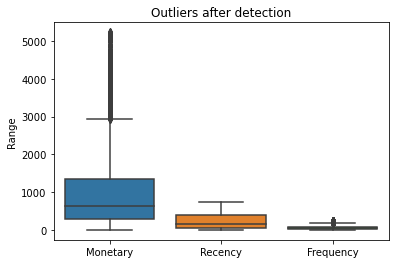

In [669]:
sns.boxplot(data=rfm[['Monetary', 'Recency', 'Frequency']])
plt.title('Outliers after detection')
plt.ylabel('Range')

After detection outliers less than before.

 **Find distribution**

In [642]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 0.6724091464285338, : SkewtestResult(statistic=17.45271843979061, pvalue=3.2823268534322524e-68)
Frequency's: Skew: 1.254576044404609, : SkewtestResult(statistic=28.245145078019803, pvalue=1.6328362498798455e-175)
Monetary's: Skew: 1.6725505206639024, : SkewtestResult(statistic=34.069065467574056, pvalue=2.119037230684856e-254)


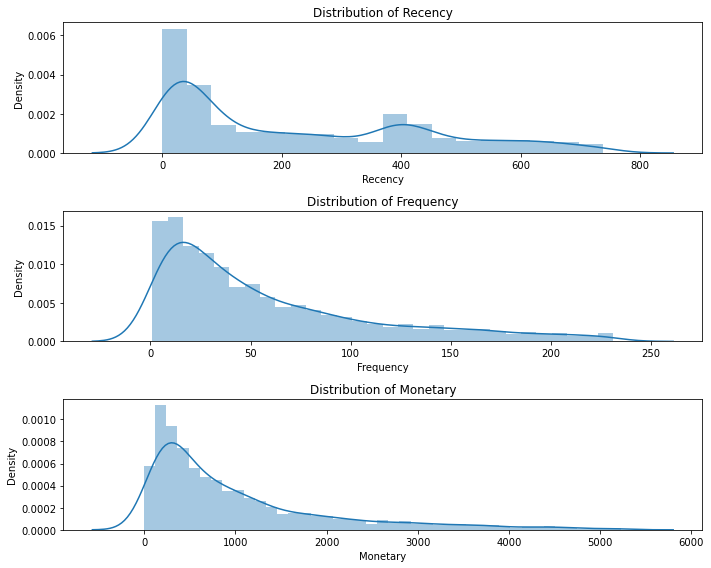

In [670]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
check_skew(rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm,'Monetary')

plt.tight_layout()

 The data is highly skewed,therefore i will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.


In [671]:
df_rfm_log = rfm.copy()
df_rfm_log.head()

,Customer ID,Monetary,Recency,Frequency
0,12348.0,2019.40,74,51
1,12349.0,4428.69,18,175
2,12350.0,334.40,309,17
3,12351.0,300.93,374,21
4,12352.0,2849.84,35,103


Recency's: Skew: -0.7728189982808675, : SkewtestResult(statistic=-19.594673168093205, pvalue=1.716844073642315e-85)
Frequency's: Skew: -0.5271158798126437, : SkewtestResult(statistic=-14.117947633910905, pvalue=2.9444220300624336e-45)
Monetary's: Skew: -0.44523700576550373, : SkewtestResult(statistic=-12.115047667699447, pvalue=8.791300682613962e-34)


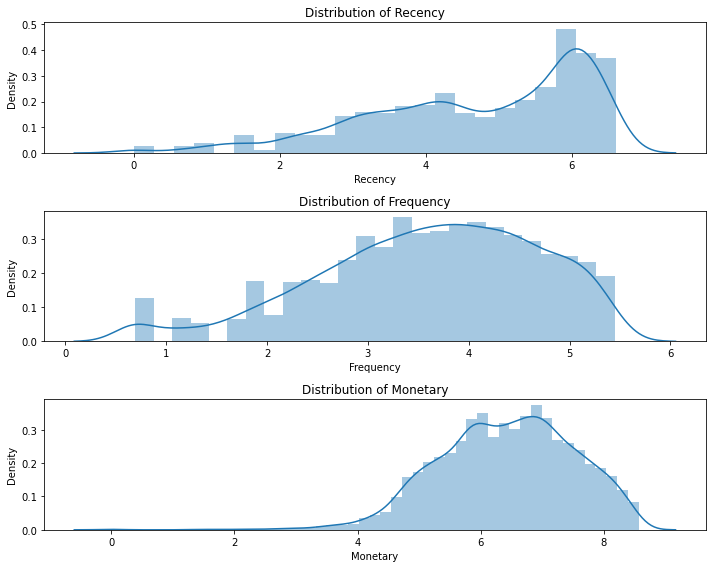

In [672]:
#add 1 
df_rfm_log = np.log(df_rfm_log + 1)

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [673]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2, #2 or 3 for the gaussian approximation, mean +- 2 std
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [674]:
#tranfrom, cap the variable.
df_rfm_log = windsoriser.transform(df_rfm_log)

 Once the skewness is reduced, I standardised the data by centring and scaling. 
  * Note all the variables now have a mean of 0 and a standard deviation of 1


In [675]:
scaler = StandardScaler()
scaler.fit(df_rfm_log)
rfm_scaled = scaler.transform(df_rfm_log)

In [677]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=df_rfm_log.columns)
rfm_scaled.head()

,Customer ID,Monetary,Recency,Frequency
0,-1.849431,1.124876,-0.297774,0.317761
1,-1.848716,1.875223,-1.267827,1.475630
2,-1.848001,-0.591505,0.704803,-0.689711
3,-1.847286,-0.691989,0.839287,-0.499141
4,-1.846570,1.453980,-0.816320,0.976018


Recency's: Skew: -0.5543457416667534, : SkewtestResult(statistic=-14.764396536660765, pvalue=2.4853687824922327e-49)
Frequency's: Skew: -0.32892166246873816, : SkewtestResult(statistic=-9.124060589643085, pvalue=7.236108222301661e-20)
Monetary's: Skew: -0.11846070830507914, : SkewtestResult(statistic=-3.3590807739990103, pvalue=0.0007820220583378692)


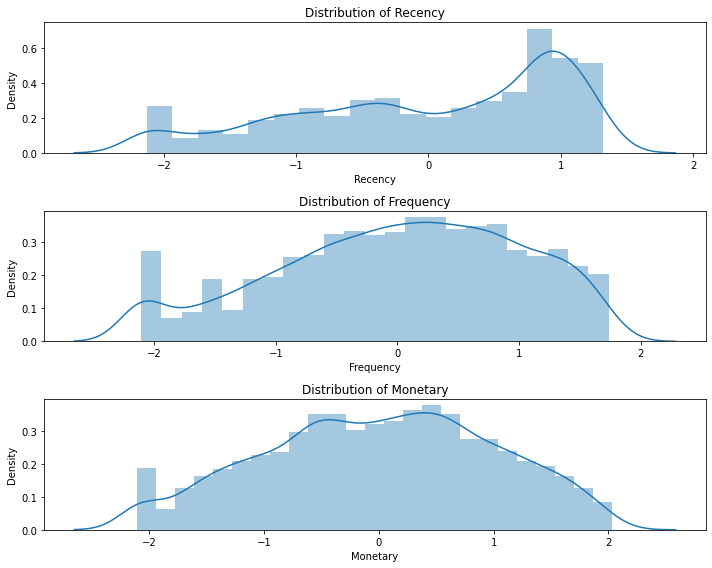

In [678]:
#normalize plot
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
check_skew(rfm_scaled,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm_scaled,'Frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_scaled,'Monetary')

plt.tight_layout()

# TASK 4 Find customer segmentation by K-means
---
K-means to perform RFM (Recency, Frequency, and Monetary) customer segmentation

In [679]:
intertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)
    intertia_scores.append(kmeans.inertia_)

intertia_scores

[19372.000000000007,
 12554.397337220387,
 10385.408058653793,
 8827.27028807157,
 7666.945431034721,
 6842.146857026717,
 6159.774243671256,
 5715.150199120002,
 5298.095432795718,
 4973.053747379054]

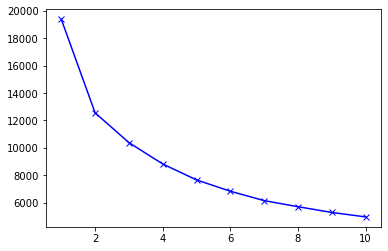

In [680]:
plt.plot(range(1,11), intertia_scores, 'bx-')

The curve bends at k = 3 and then it becomes smooth for k >4. Hence, we choose k = 3 as optimum no. of clusters.

 chosen 4 cluster
 --

In [705]:
kmeans = KMeans(n_clusters=4,max_iter=10, random_state=0, init='random')
kmeans.fit(rfm_scaled)

KMeans(init='random', max_iter=10, n_clusters=4, random_state=0)

In [706]:
rfm['Cluster'] = kmeans.labels_
rfm.head()

,Customer ID,Monetary,Recency,Frequency,Cluster
0,12348.0,2019.40,74,51,2
1,12349.0,4428.69,18,175,1
2,12350.0,334.40,309,17,2
3,12351.0,300.93,374,21,2
4,12352.0,2849.84,35,103,1


## **Visualizations of Customer Segmentation :**
use violinplot to see each segments.

In [707]:
rfm.groupby(['Cluster']).agg({
        'Monetary': 'mean',
        'Recency': 'mean',
        'Frequency': ['mean', 'count']}).round()

Monetary Recency Frequency      
            mean    mean      mean count
Cluster                                 
0         1031.0   256.0      64.0  1202
1         1970.0    30.0     112.0  1237
2          868.0   271.0      47.0  1146
3          217.0   366.0      12.0  1258

In [708]:
rfm.groupby(['Cluster']).agg({
        'Monetary': ['max','mean','min'],
        'Recency': ['max','mean','min'],
        'Frequency': ['max','mean','min','count']}).round()

Monetary                Recency            Frequency                 
             max    mean    min     max   mean min       max   mean min count
Cluster                                                                      
0         4757.0  1031.0  112.0     735  256.0   9       231   64.0   1  1202
1         5232.0  1970.0  120.0     379   30.0   0       231  112.0   1  1237
2         5178.0   868.0   74.0     737  271.0   0       229   47.0   1  1146
3         1770.0   217.0    0.0     738  366.0   0        53   12.0   1  1258

Text(0.5, 0, 'Cluster')

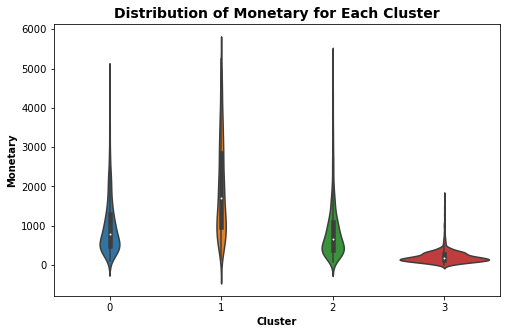

In [709]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Cluster', y='Monetary', data=rfm)
plt.title("Distribution of Monetary for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Monetary", fontweight = 'bold')
plt.xlabel("Cluster", fontweight = 'bold')

Cluster 3 have the least monetary, with median of 30 units. Cluster 0,1,2 have a similar pattern of distribution, but Cluster 1 have median higher than all. So, customer in cluster 1 has the most spending in lifetime.

Text(0.5, 0, 'Cluster')

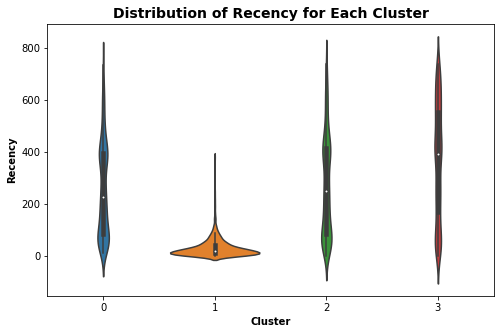

In [710]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Cluster', y='Recency', data=rfm)
plt.title("Distribution of Recency for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')
plt.xlabel("Cluster", fontweight = 'bold')

Cluster 1 have the least recency, with median of 30 units. Cluster 0,2,3 have a similar pattern of distribution, but Cluster 3 have median higher than all. So, customer in cluster 1 has recently spnding in retail ,any way customer in cluster 3 came to buy a logtime ago.

Text(0.5, 0, 'Cluster')

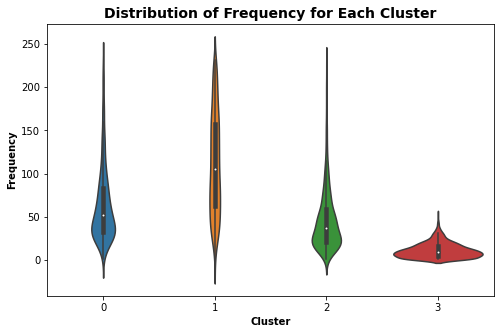

In [711]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Cluster', y='Frequency', data=rfm)
plt.title("Distribution of Frequency for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.xlabel("Cluster", fontweight = 'bold')

Cluster 3 have the least frequency, with median of 12 units. Cluster 0,2 have a similar pattern of distribution. Cluster 1 have median higher than all. So, customer in cluster 3 rarely come in to buy but customer in cluster 1 most used online retail.   

Text(0.5, 0, 'Frequency')

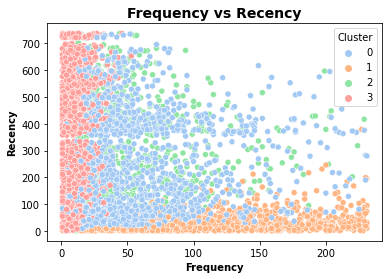

In [712]:
sns.scatterplot('Frequency', 'Recency', data=rfm, hue='Cluster', palette='pastel')
plt.title('Frequency vs Recency', fontsize = 14, fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')
plt.xlabel("Frequency", fontweight = 'bold')

The customers in cluster 0 have more recency and less frequency, so these customers shopped from the store in the past and then never returned. 

The customer in cluster 1 more frequency and less recency, so they are loyal customers of the store

The customer in cluster 2 and cluster 3 have moderate frequency and moderate recency.

Text(0, 0.5, 'Recency')

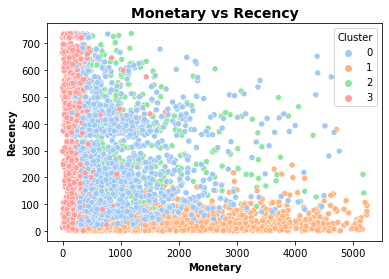

In [717]:
sns.scatterplot('Monetary', 'Recency', data=rfm, hue='Cluster', palette='pastel')
plt.title('Monetary vs Recency', fontsize = 14, fontweight = 'bold')
plt.xlabel("Monetary", fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')

The customers in cluster 1 have more Monetary and recently shopped. 

The customer in cluster 3 more recency and less Monetary.

The customer in cluster 0, 2 have moderate monetary and moderate recency.

Text(0, 0.5, 'Frequency')

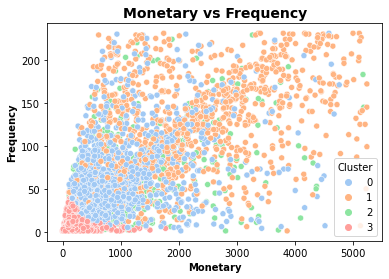

In [718]:
sns.scatterplot('Monetary', 'Frequency', data=rfm, hue='Cluster', palette='pastel')
plt.title('Monetary vs Frequency', fontsize = 14, fontweight = 'bold')
plt.xlabel("Monetary", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')

This scatter above almost overlap. The customer in cluster 0, cluster 1 and cluster 2 have more frequency and monetary but cluster 1 might high-value customer.

The customer in cluster 3 have less frequency and less monetary.

Conclusion
--
1. The customer in cluster 1 are the high-Value customers. They are recently shopped, frequent and high monetary.

2. The customer in cluster 0 and cluster 2 almost overlap. They have moderate frequent, moderate recency and moderate monetary. The difference between the two cluster is cluster 2 shopped often than cluster 0 but cluster 0 more monetary than cluster 2.

3. The customer in cluster 3 new to the store or shopped in the store in the past but don't come back very often.

4. By further analysis of clusters by each countries,different strategies can be made for different countries.  

---

References :

1 : https://medium.com/analytics-vidhya/customer-segmentation-with-rfm-analysis-kmeans-clustering-32c387d04dfe

2 : https://github.com/jasneekchugh/Customer-Segmentation-using-K-mean/blob/main/K-means%20clustering%20using%20RFM%20variables.ipynb

3 : https://grimreaperjunior.medium.com/สกัดข้อมูลให้ตรงใจด้วยการทำ-feature-engineering-bcdba80124bc